## Моделювання неоднорідного процесу Пуассона

1. $N \sim NPP(\lambda)$. Показати, що $P(N[t,t+h] = 1)/h \to \lambda(t)$ та $P(N[t,t+h] > 1)/h \to 0$ при $h \downarrow 0$

Доведення першого результату:
$\frac{P(N[t,t+h] = 1)}{h} = \frac{m[t,t+h]\exp(-m[t,t+h])}{h} = ...$

$m[t,t+h] = \int_t^{t+h} \lambda(s) ds$

$... = \frac{m[t,t+h] - m[t,t+0]}{h} \cdot \exp(-m[t,t+h]) \to (m[t,t+h])_{h=0}^{'} \cdot 1 = \lambda(t)$

Доведення другого результату:
$\frac{P(N[t,t+h] > 1)}{h} = \frac{1 - P(N[t,t+h] = 0) - P(N[t,t+h]=1)}{h} = ...
$

$\frac{1 - P(N[t,t+h] = 0)}{h} = -\frac{e^{-m[t,t+h]} - e^{-m[t,t+0]}}{h} \to \lambda(t)$

$... = \frac{1 - P(N[t,t+h] = 0)}{h} - \frac{P(N[t,t+h] = 1)}{h} \to 0$

2. Якщо $\tau$ має розподіл $F$, що $F^{-1}(U) =^d \tau$, де $U \sim U[0,1]$.

Доведення: для довільного $x \in \mathbb{R}$ маємо
$P(F^{-1}(U) < x) = P(U < F(x)) = F(x) - 0 = F(x) = P(\tau < x)$

3. Змоделювати $NPP(\lambda)$, де
  а. $\lambda(t) = t$
  б. $\lambda(t) = t^{1/10}$
  в. $\lambda(t) = t^{10}$
Порівняти траєкторії.

Нехай $\Lambda(t) = \int_0^t \lambda(s)ds$. Реалізуємо наступний алгоритм:
1. Покласти $t = 0$
2. Згенерувати $U \sim U[0,1]$
3. Покласти $t := t - \ln(u)$
4. Обчислити $s := \inf\{v > 0: \Lambda(v) \geq t\}$
5. Повернути момент стрибку $s$.
6. Повторити кроки (1)-(6).

$\int_0^v u^k du = v^{k+1}/(k+1) \geq s$

Звідси $v^{k+1} \geq s (k+1)$

А тому $v \geq (s (k+1))^{1/(k+1)}$

Отже крок 4. перезапишеться наступним чином:
4'. Обчислити $s := (t (k+1))^{1/(k+1)}$

Для довільної інтенсивності з пунктів а, б, в.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(778)

$\lambda(t) = t$

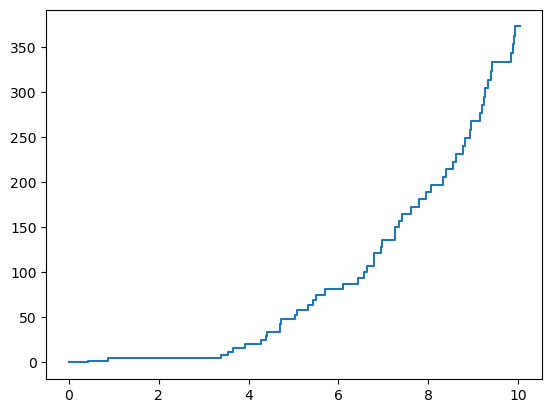

In [54]:
max_time = 10
times = [0]
t = 0
k = 1
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = t - np.log(u)
    s = (t * (k + 1)) ** (1 / (k + 1))
    times.append(float(s))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

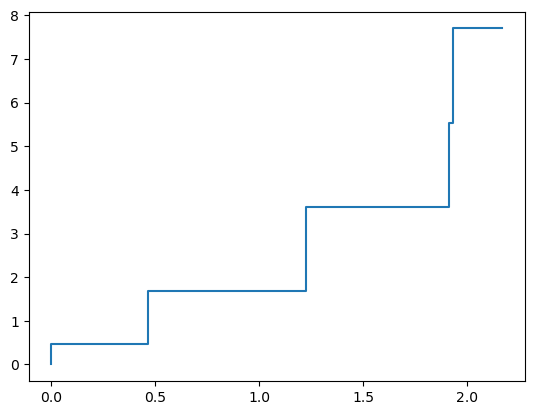

In [55]:
max_time = 2
times = [0]
t = 0
k = 1
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = t - np.log(u)
    s = (t * (k + 1)) ** (1 / (k + 1))
    times.append(float(s))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

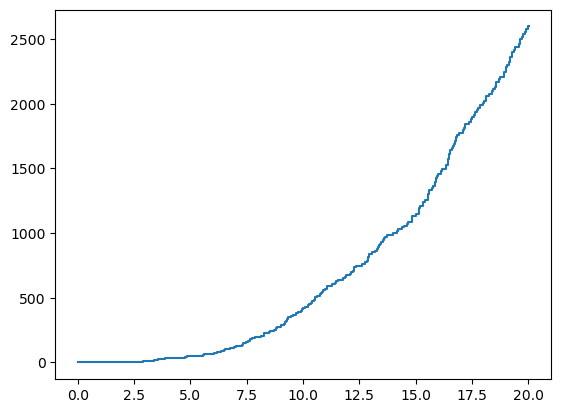

In [56]:
max_time = 20
times = [0]
t = 0
k = 1
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = t - np.log(u)
    s = (t * (k + 1)) ** (1 / (k + 1))
    times.append(float(s))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

$\lambda(t) = t^{10}$

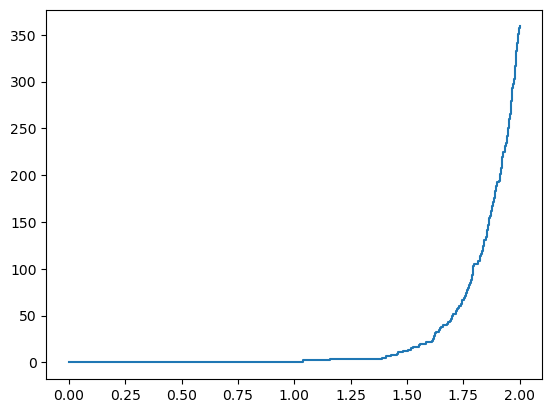

In [57]:
max_time = 2
times = [0]
t = 0
k = 10
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = t - np.log(u)
    s = (t * (k + 1)) ** (1 / (k + 1))
    times.append(float(s))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

$\lambda(t) = t^{1/10}$

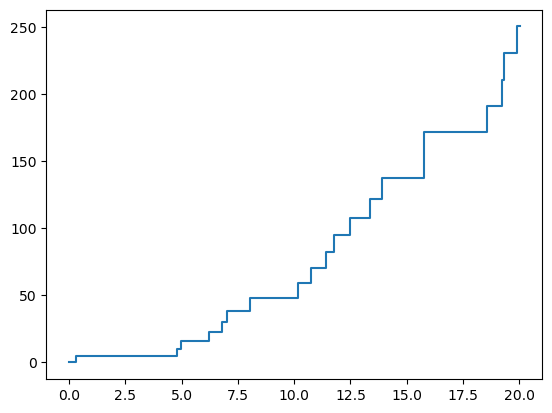

In [58]:
max_time = 20
times = [0]
t = 0
k = 1 / 10
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = t - np.log(u)
    s = (t * (k + 1)) ** (1 / (k + 1))
    times.append(float(s))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

Інший спосіб моделювання:
1. Покласти $t = 0$
2. Згенерувати $U \sim U[0,1]$
3. Покласти $t := t - F_t^{-1}(U)$
4. Обчислити $s := \inf\{v > 0: \Lambda(v) \geq t\}$
5. Повернути момент стрибку $s$.
6. Повторити кроки (1)-(6).

Тут $F_s(h) = 1 - \exp(\int_s^{s+h}\lambda(u)du)$
Знайдемо $F_s^{-1}(p)$, $p \in (0,1)$:
$\int_s^{s+h}\lambda(u)du = ((s + h)^{k+1} - s^{k+1})/(k+1) = -\ln(1 - p)$

$h = (s^{k+1}-\ln(1-p)(k+1))^{1/(k+1)} - s$

$\lambda(t) = t$

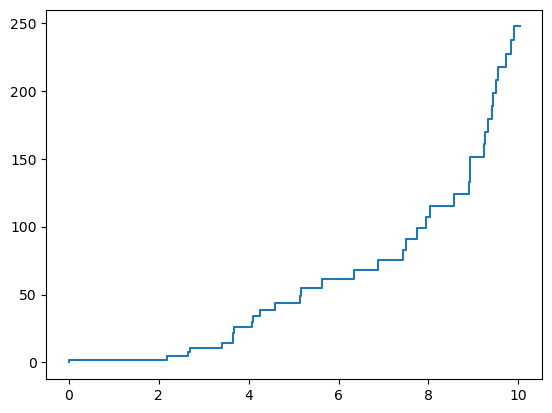

In [59]:
max_time = 10
times = [0]
t = 0
k = 1
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = (t ** (k + 1) - np.log(u) * (k + 1)) ** (1 / (k + 1))
    times.append(float(t))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

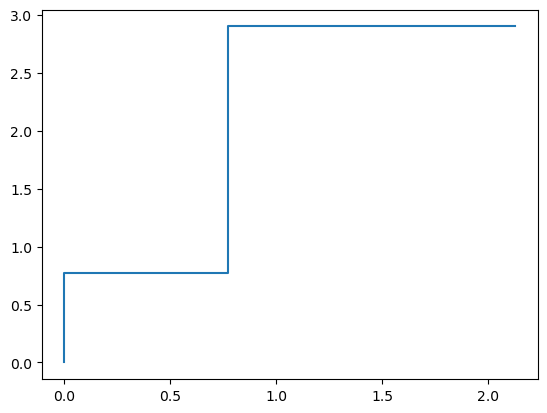

In [60]:
max_time = 2
times = [0]
t = 0
k = 1
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = (t ** (k + 1) - np.log(u) * (k + 1)) ** (1 / (k + 1))
    times.append(float(t))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

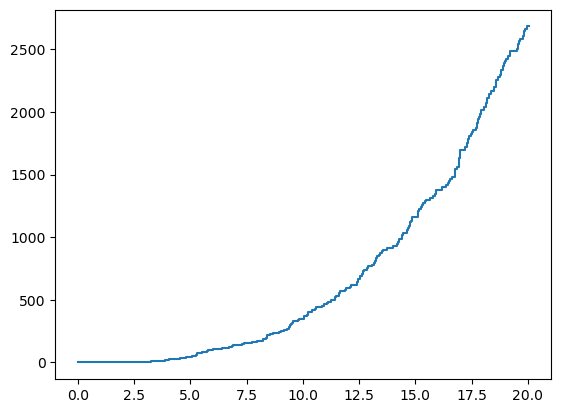

In [61]:
max_time = 20
times = [0]
t = 0
k = 1
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = (t ** (k + 1) - np.log(u) * (k + 1)) ** (1 / (k + 1))
    times.append(float(t))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

$\lambda(t) = t^{10}$

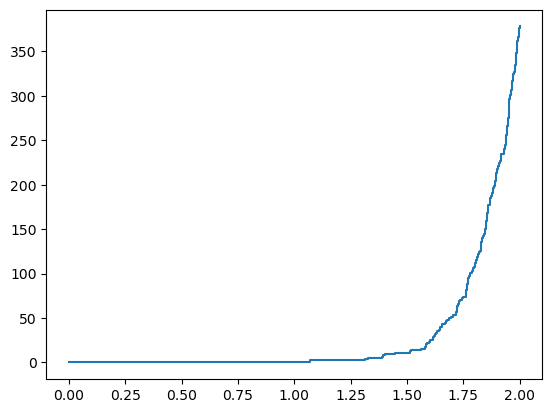

In [62]:
max_time = 2
times = [0]
t = 0
k = 10
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = (t ** (k + 1) - np.log(u) * (k + 1)) ** (1 / (k + 1))
    times.append(float(t))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

$\lambda(t) = t^{1/10}$

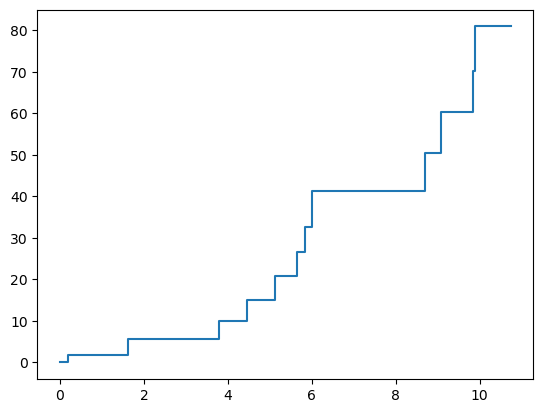

In [63]:
max_time = 10
times = [0]
t = 0
k = 1 / 10
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = (t ** (k + 1) - np.log(u) * (k + 1)) ** (1 / (k + 1))
    times.append(float(t))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

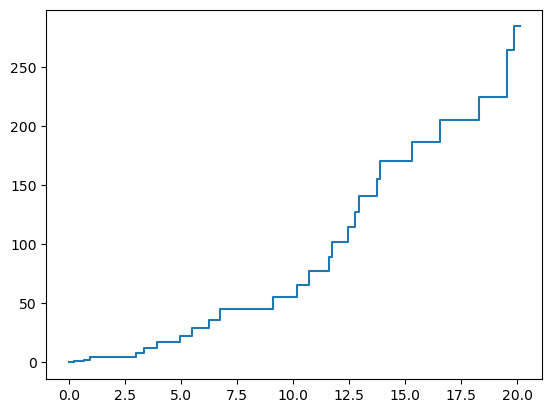

In [64]:
max_time = 20
times = [0]
t = 0
k = 1 / 10
while max(times) < max_time:
    u = np.random.uniform(0, 1, 1)
    t = (t ** (k + 1) - np.log(u) * (k + 1)) ** (1 / (k + 1))
    times.append(float(t))
counts = np.append(0, np.cumsum(times[1:]))

plt.step(times, counts)
plt.show()

4. $D[Y] = E[D[Y|X]] + D[E[Y|X]]$ для випадкових величин $X$ та $Y$.

Доведення:
$E[D[Y|X]] = E[E[Y^2|X]] - E[(E[Y|X])^2] $=

$= E[Y^2] - (E[Y])^2 + (E[Y])^2 - E[(E[Y|X])^2] $=

$= D[Y] - D[E[Y|X]]$

Використовуючи телескопічну властивість. Звідти маємо, що $D[Y] = E[D[Y|X]] + D[E[Y|X]]$.

5. Нехай $N_t$ -- простий процес Пуассона, а $S_t$ -- складний процес Пуассона:
$S_t = \sum_{j = 1}^{N_t} \xi_j$

6. Знайти $E[\exp(\lambda S_t)]$.

Доведення:
$E[\exp(\lambda S_t)] = E[\exp(\lambda \sum_{j = 1}^{N_t} \xi_j)] = \sum_{k = 0}^{+\infty}P(N_t = k)E[\exp(\lambda \sum_{j = 1}^{N_t} \xi_j)|N_t=k]$

$E[\exp(\lambda \sum_{j = 1}^{N_t} \xi_j)|N_t=k] = (E[\exp(\lambda\xi_1)])^k$

$E[\exp(\lambda S_t)] = \sum_{k = 0}^{+\infty}P(N_t = k)(E[\exp(\lambda\xi_1)])^k  = E[\exp(\ln(E[\exp(\lambda\xi_1))]N_t)]$